cdfからtplot変数を作成

In [1]:
import pyspedas
import pytplot
from pytplot import options
from pytplot import tplot
from pytplot import tlimit
import matplotlib.pyplot as plt
from load import mca, orb
trange = ['2000-01-10', '2000-01-11']
mca(trange=trange)
tplot_names = pytplot.tplot_names(True)
Emax_tvar = pytplot.get_data('Bmax')
Times = Emax_tvar.times
Emax = Emax_tvar.y
Emax_freq = Emax_tvar.v
print(Emax)




15-Jul-22 12:10:03: /home/www/.local/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),



[[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [  0   0   0 ...   0   0   0]]


In [2]:
Emax_freq

array([3.16e+00, 5.62e+00, 1.00e+01, 1.78e+01, 3.16e+01, 5.62e+01,
       1.00e+02, 1.78e+02, 3.16e+02, 5.62e+02, 1.00e+03, 1.78e+03,
       3.16e+03, 5.62e+03, 1.00e+04, 1.78e+04], dtype=float32)

プロット

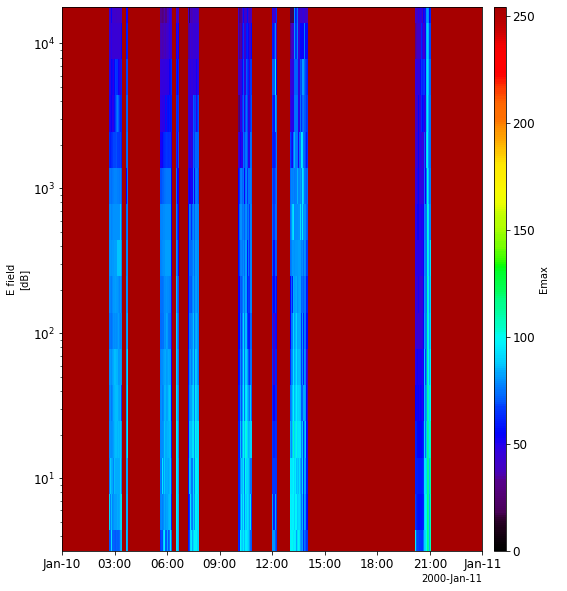

In [3]:
options('Emax', 'spec', 1)
tplot('Emax')

tplot変数の中身確認

In [4]:
import numpy as np
a = np.max(Emax)
print(a)

254


In [5]:
print(Emax == 254)
print(sum(Emax == 254))
print(Emax.shape)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False False False ... False False False]]
[8380 8380 8380 8380 8380 8380 8380 8380 8380 8380 8380 8380 8380 8380
 8380 8380]
(10800, 16)


In [6]:
Emax_float = Emax.astype(float)
Emax_float_test = np.copy(Emax_float)
np.place(Emax_float, Emax_float == 254, np.nan)
print(Emax_float, Emax_float_test)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [ 0.  0.  0. ...  0.  0.  0.]] [[254. 254. 254. ... 254. 254. 254.]
 [254. 254. 254. ... 254. 254. 254.]
 [254. 254. 254. ... 254. 254. 254.]
 ...
 [254. 254. 254. ... 254. 254. 254.]
 [254. 254. 254. ... 254. 254. 254.]
 [  0.   0.   0. ...   0.   0.   0.]]


plot test

In [7]:
pytplot.store_data('Emax_nan', data={'x': Times, 'y': Emax_float, 'v': Emax_freq})

True

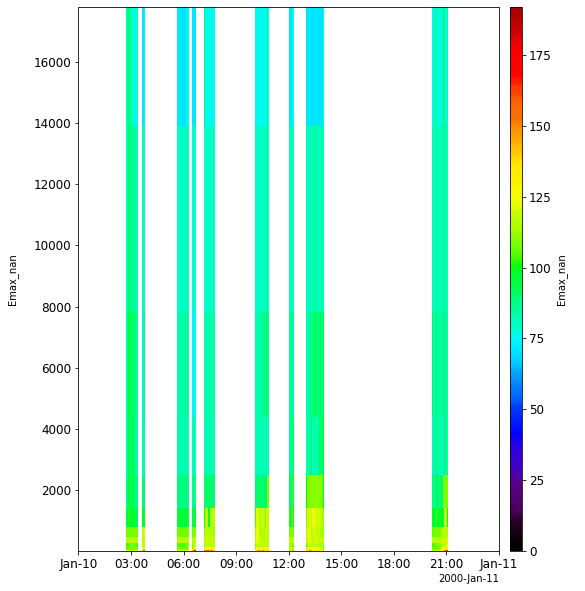

In [8]:
pytplot.options('Emax_nan', 'spec', 1)
pytplot.tplot('Emax_nan')

In [8]:

print(Emax.shape)
pyspedas.time_clip(names='Emax', time_start='2000-01-10 00:00:00', time_end='2000-01-10 03:00:00', new_names='Emax_clip')
Emax_clip = pytplot.get_data('Emax_clip')
print(Emax_clip.y.shape)
pyspedas.time_clip(names='Emax', time_start='2000-01-10 00:00:00', time_end='2000-01-10 04:00:00', new_names='Emax_clip')
Emax_clip = pytplot.get_data('Emax_clip')
print(Emax_clip.y.shape)

(10800, 16)
Emax copied to Emax_clip
Time clip was applied to: Emax_clip
(1350, 16)
Emax copied to Emax_clip
Time clip was applied to: Emax_clip
(1800, 16)


In [13]:
import numpy as np
for i in range(4):
    tplot_variable = pytplot.get_data(tplot_names[i])
    tplot_variable_float = (tplot_variable.y).astype(float)
    np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
    tplot_variable_0dB = 1e-6 #mV or pT
    bandwidth = tplot_variable.v * 0.3
    tplot_variable_power = (10**(tplot_variable_float/10)) * (tplot_variable_0dB**2) / bandwidth 
    pytplot.store_data(tplot_names[i] +'_power', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})

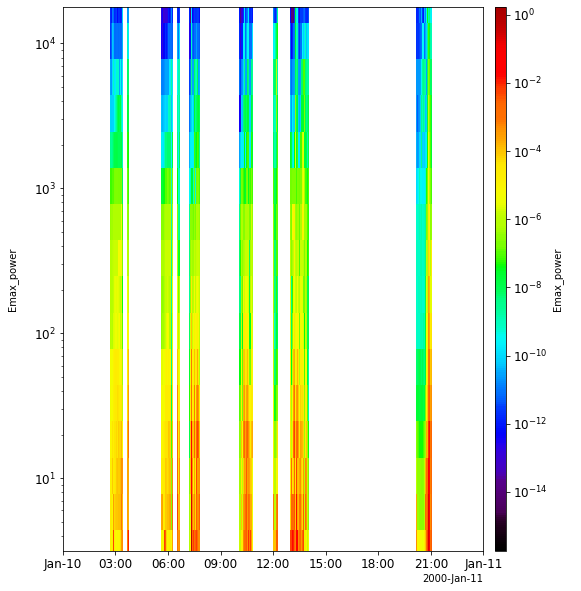

In [14]:
pytplot.options('Emax_power', 'spec', 1)
options('Emax_power', 'ylog', 1)
options('Emax_power', 'zlog', 1)
pytplot.tplot('Emax_power')

Emax_power copied to Emax_power_clip
Time clip was applied to: Emax_power_clip


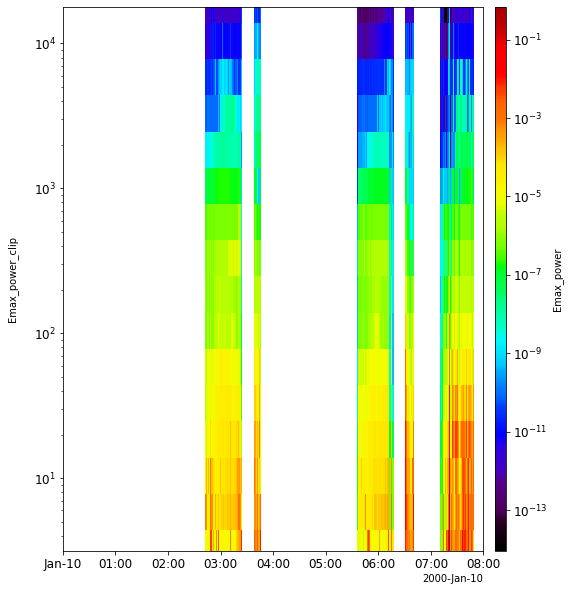

Emax_power copied to Emax_power_clip
Time clip was applied to: Emax_power_clip


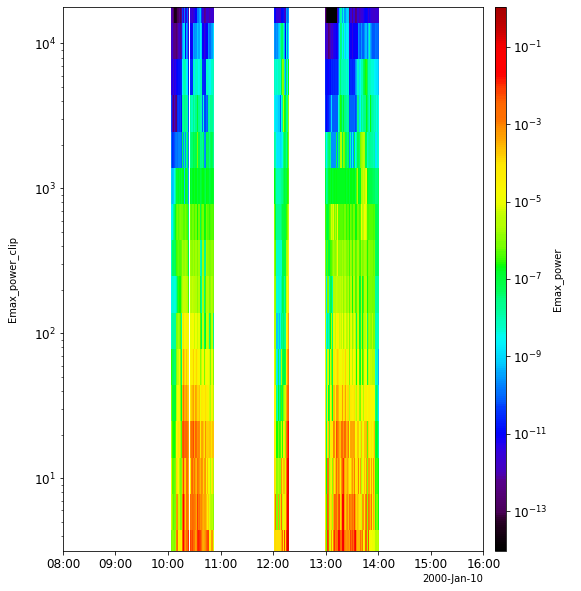

Emax_power copied to Emax_power_clip
Time clip was applied to: Emax_power_clip


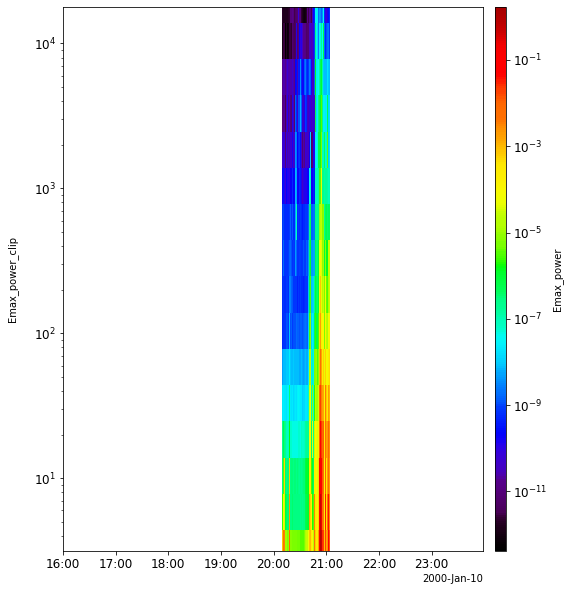

In [20]:
time_list = ['2000-01-10 00:00:00', '2000-01-10 08:00:00', '2000-01-10 16:00:00', '2000-01-10 23:59:00']
for i in range(3):
    time_start = time_list[i]
    time_end = time_list[i+1]
    pyspedas.time_clip('Emax_power', time_start=time_start, time_end=time_end, new_names='Emax_power_clip')
    Emax = pytplot.get_data('Emax_power_clip')
    Emax_10Hz = Emax.y.T[2]
    if np.nanmax(Emax_10Hz) >= 0.1:
        options('Emax_power_clip', 'spec', 1)
        options('Emax_power_clip', 'ylog', 1)
        options('Emax_power_clip', 'zlog', 1)
        pytplot.tplot('Emax_power_clip')
    else:
        pass

In [26]:
a =10
if a >= 10:
    event_case = 'super_strong'
elif a >=1:
    event_case = 'strong'
print(event_case)

super_strong


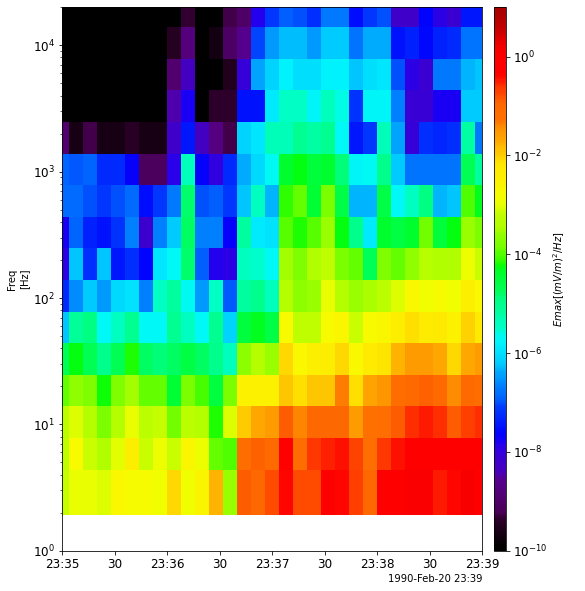

In [3]:
tlimit(['1991-07-11 23:35:00', '1990-02-20 23:39:00'])
options('Emax_power', 'spec', 1)
options('Emax_power', 'ytitle', 'Freq')
options('Emax_power', 'ysubtitle', '[Hz]')
options('Emax_power', 'ztitle', '$Emax [(mV/m)^2/Hz]$')
options('Emax_power', 'zrange', [1e-10, 1e1])
options('Emax_power', 'yrange', [1,20000])
options('Emax_power', 'ylog', 1)
options('Emax_power', 'zlog', 1)
options('Bmax_power', 'spec', 1)
options('Bmax_power', 'ytitle', 'Freq')
options('Bmax_power', 'ysubtitle', '[Hz]')
options('Bmax_power', 'ztitle', '$Bmax [pT^2/Hz]$')
options('Bmax_power', 'zrange', [1e-8, 1e5])
options('Bmax_power', 'yrange', [1,20000])
options('Bmax_power', 'ylog', 1)
options('Bmax_power', 'zlog', 1)
tplot('Emax_power', slice = True)


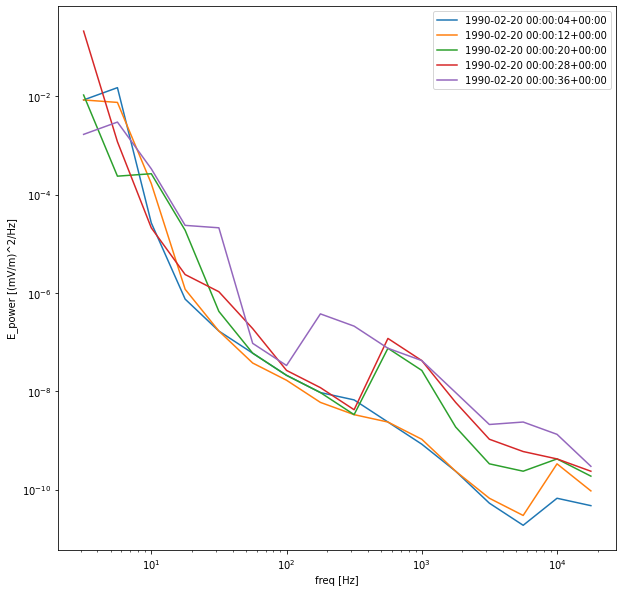

In [34]:
Emax_power = pytplot.get_data('Emax_power')
time = Emax_power.times
slice_time = pyspedas.time_double('1989-06-07 23:38:00')
for i in range(time.size):
    if time[i] > slice_time:
        pass
    else:
        slice_time_index = i
        slice_time = time[i]
        break
Emax_power_slice = Emax_power.y[slice_time_index]
freq_range = Emax_power.v

import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
for i in range(5):
    plt.plot(freq_range, Emax_power.y[slice_time_index + i], label = pyspedas.time_datetime(time[slice_time_index + i]))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('freq [Hz]')
plt.ylabel('E_power [(mV/m)^2/Hz]')

plt.legend()
plt.savefig("output2.jpg")

In [1]:
a = ['/orb/20210405.cdf', '/orb/20201201.cdf', '/orb/20210408.cdf']
a_sorted = sorted(a)
a_sorted

['/orb/20201201.cdf', '/orb/20210405.cdf', '/orb/20210408.cdf']

In [2]:
import pyspedas 


In [6]:
a = pyspedas.time_double('2014-01-01')
b = pyspedas.time_double('2014-01-02')
b-a

86400.0

In [8]:
from pyspedas.utilities.dailynames import dailynames
trange = ['2021-01-01', '2021-01-03']
file_names = dailynames(file_format='/ED%y%m%d.txt', trange=trange)
file_names

['/ED210101.txt', '/ED210102.txt']

In [11]:
import pyspedas
import pytplot
from pytplot import options
from pytplot import tplot
from pytplot import tlimit
from pytplot import tplot_options
import Akebono_mca_load
import Akebono_orb_load
import numpy as np

date = '19910611'
importer2 = Akebono_orb_load.Akebono_orb_load(date)
importer2.orb()